## <div style="background-color: #BAE3BC; padding: 10px;"><b>Exercicis d'anàlisi de sentiment i textos.</b>

</div>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
import string

### Exercici 1

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

#### Comentaris respecte de l'elecció del text

He escollit com a text l'últim discurs del ex-president Xilè Salvador Allende hores abans del cop d'estat que el va enderrocar. Aquest discurs és un dels més importants de la història de Xilè i es caracteritza per la seva emotivitat. El discurs va ser dirigit el poble de Xile i principalment els seus treballadors. Malgrat l'Allende va dir clarament coses negatives sobre el que pensava del dirigents militars d'aquell moment, el seu discurs va tenir força components positius sobre el que ell pensava del futur de Xile. Per tant, serà interessant no només veure quines van ser les paraules més pronunciades sinó que també si el to va tenir una composició més negativa que positiva o viceversa. 

In [2]:
speech = """Surely this will be the last opportunity in which I can address you. The Air Force has bombed the towers of Radio Portales and Radio Corporación. My words are not bitter, but rather filled with disappointment. Let them be a moral punishment for those who have betrayed the oath they made: soldiers of Chile, commanders-in-chief, Admiral Merino, who has proclaimed himself as the Commander-in-Chief of the Navy, along with Mr. Mendoza, a low-ranking general who just yesterday expressed his loyalty and allegiance to the government and now has declared himself as the Director General of the Carabineros.

In the face of these events, I can only say to the workers: I will not resign! Placed in a historic moment, I will pay with my life the loyalty of the people. And I tell you that I have the certainty that the seed we have sown in the conscience of thousands and thousands of Chileans will not be silenced.

Workers of my country, I want to thank you for the loyalty you have always shown, the trust you have placed in a man who was only the interpreter of great aspirations for justice, who pledged to respect the Constitution and the law, and so he did. In this definitive moment, the last one in which I can address you, I want you to take advantage of the lesson: foreign capital, imperialism, united with reaction, created the climate for the Armed Forces to break their tradition, which was taught to them by General Schneider and reaffirmed by Commander Araya, victims of the same social sector that today will be waiting, with foreign hands, to reclaim power in order to continue defending their privileges and their ill-gotten gains.

I address myself, above all, to the humble woman of our land, to the peasant who believed in us, to the worker who worked harder, to the mother who knew of our concern for the children. I address myself to the professionals of the country, to the patriotic professionals who continued working against the sedition instigated by the professional associations, class associations designed to defend the advantages of a capitalist society for a few.

I address myself to the youth, to those who sang and gave their joy and their spirit of struggle. I address myself to the people of Chile, to the worker, to the peasant, to the intellectual, to those who will be persecuted because fascism has already been present for many hours, carrying out terrorist acts, blowing up bridges, cutting railroad tracks, destroying oil and gas pipelines, in the face of the silence of those who had the obligation to act.

I am certain that the seed we have planted in the conscience of thousands and thousands of Chileans cannot be eradicated. You have the strength, they may crush us, but social processes cannot be halted by crime or force. History is ours, and it is made by the people.

Workers of my country, I have faith in Chile and its destiny. Other men will overcome this dark and bitter moment in which treason seeks to impose itself. You should know that, sooner rather than later, the great avenues will be opened again where free men will pass to build a better society.

Long live Chile! Long live the people! Long live the workers! These are my last words, and I have the certainty that my sacrifice will not be in vain. I am certain that, at the very least, there will be a moral punishment that will castigate treason, cowardice, and betrayal."""

speech

'Surely this will be the last opportunity in which I can address you. The Air Force has bombed the towers of Radio Portales and Radio Corporación. My words are not bitter, but rather filled with disappointment. Let them be a moral punishment for those who have betrayed the oath they made: soldiers of Chile, commanders-in-chief, Admiral Merino, who has proclaimed himself as the Commander-in-Chief of the Navy, along with Mr. Mendoza, a low-ranking general who just yesterday expressed his loyalty and allegiance to the government and now has declared himself as the Director General of the Carabineros.\n\nIn the face of these events, I can only say to the workers: I will not resign! Placed in a historic moment, I will pay with my life the loyalty of the people. And I tell you that I have the certainty that the seed we have sown in the conscience of thousands and thousands of Chileans will not be silenced.\n\nWorkers of my country, I want to thank you for the loyalty you have always shown, t

### Tokenization

1. El primer que farem serà dividir el text en unitats més petites que anomenarem "tokens". Deixarem totes les paraules en minúscula perquè quan fem el recompte no hi hagi diferències entre majúscules i minúscules amb la mateixa paraula.
2. En segon lloc, com que per l'anàlisi no necessitem  ni punts ni comes, entre altres només ens quedarem amb els caràcteres alfabètics.
3. Després farem un dataframe on mirarem el llistat generat amb les freqüències de totes les paraules del text, sense caràcteres no alfabètics.
4. Finalment farem algunes gràfiques per visualitzar las variables aconseguides.

In [3]:
#1
speech_word = word_tokenize(speech.lower())

#2
speech_word = [token for token in speech_word if token.isalpha()]

print(speech_word)

['surely', 'this', 'will', 'be', 'the', 'last', 'opportunity', 'in', 'which', 'i', 'can', 'address', 'you', 'the', 'air', 'force', 'has', 'bombed', 'the', 'towers', 'of', 'radio', 'portales', 'and', 'radio', 'corporación', 'my', 'words', 'are', 'not', 'bitter', 'but', 'rather', 'filled', 'with', 'disappointment', 'let', 'them', 'be', 'a', 'moral', 'punishment', 'for', 'those', 'who', 'have', 'betrayed', 'the', 'oath', 'they', 'made', 'soldiers', 'of', 'chile', 'admiral', 'merino', 'who', 'has', 'proclaimed', 'himself', 'as', 'the', 'of', 'the', 'navy', 'along', 'with', 'mendoza', 'a', 'general', 'who', 'just', 'yesterday', 'expressed', 'his', 'loyalty', 'and', 'allegiance', 'to', 'the', 'government', 'and', 'now', 'has', 'declared', 'himself', 'as', 'the', 'director', 'general', 'of', 'the', 'carabineros', 'in', 'the', 'face', 'of', 'these', 'events', 'i', 'can', 'only', 'say', 'to', 'the', 'workers', 'i', 'will', 'not', 'resign', 'placed', 'in', 'a', 'historic', 'moment', 'i', 'will',

In [4]:
#3
freq_word = FreqDist(speech_word)

In [5]:
#4
freq_word_df = pd.DataFrame(FreqDist(speech_word).items(), columns=["Paraula", "Frequencia"]).sort_values(by="Frequencia", ascending=False)
freq_word_df.head(25)

,Paraula,Frequencia
4,the,54
63,to,26
18,of,23
21,and,18
9,i,17
7,in,14
40,who,12
2,will,12
3,be,10
41,have,9


La tokenització ens deixa un serie de paraules amb la seva freqüència. Les més importants des del punt de vista de la quantit de vegades que es repetixen són; "the", "to", "of", "and", "i", "in", "who", "will", "be" i "have". Ara mirarem un parell de gràfiques on veurem les freqüències de dues formes diferents. Primer, ho farem a través d'un gràfic de línia i després amb un núvol de paraules.

### Visualitzacions

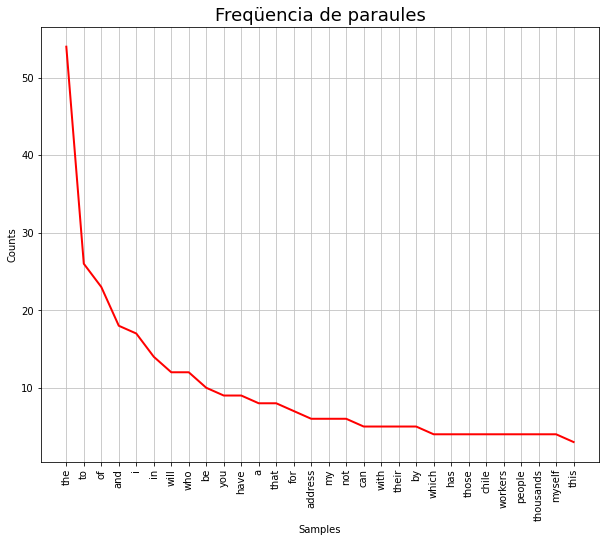

In [6]:
plt.figure(figsize=(10, 8))

plt.title('Freqüencia de paraules', size=18)
freq_word.plot(30, c='red')

plt.show()

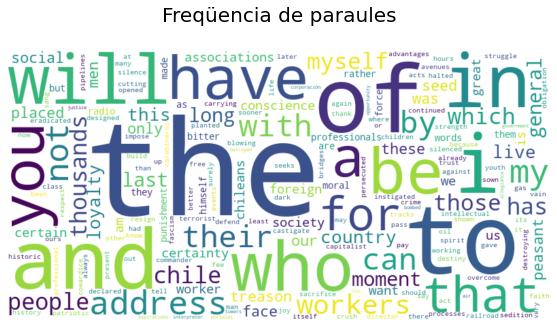

In [7]:
from wordcloud import WordCloud

word_freq = dict(zip(freq_word_df['Paraula'], freq_word_df['Frequencia']))
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.title('Freqüencia de paraules\n', size=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Ja podem veure que les primeres 10 paraules són principalment conectors, és a dir que no tenen un significat en si mateix que després poguem fer servir per analitzar sentiments. Per tant el que farem en els següents pasos serà eliminar aquestes paraules sense significat.

### Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

Primer de tot eliminarem les stopwords perquè quedi només el contingut de valor del discurs. Després farem l'stemming, és a dir, reduirem les paraules a la seva forma base o arrel.

In [8]:
speech_sense_stopw = [token for token in speech_word if token not in stopwords.words("english")]

# Recalcualate frequence of words without stop words
freq_sense_stopw = FreqDist(speech_sense_stopw)

# Df of words frequency uploaded
freq_sense_stopw_df = pd.DataFrame(FreqDist(speech_sense_stopw).items(), columns=["Paraula", "Frequencia"]).sort_values(by="Frequencia", ascending=False)
freq_sense_stopw_df.head(20)

,Paraula,Frequencia
3,address,6
23,chile,4
42,workers,4
49,people,4
55,thousands,4
1,last,3
190,live,3
46,moment,3
33,loyalty,3
189,long,3


### Visualitzacions sense StopWords

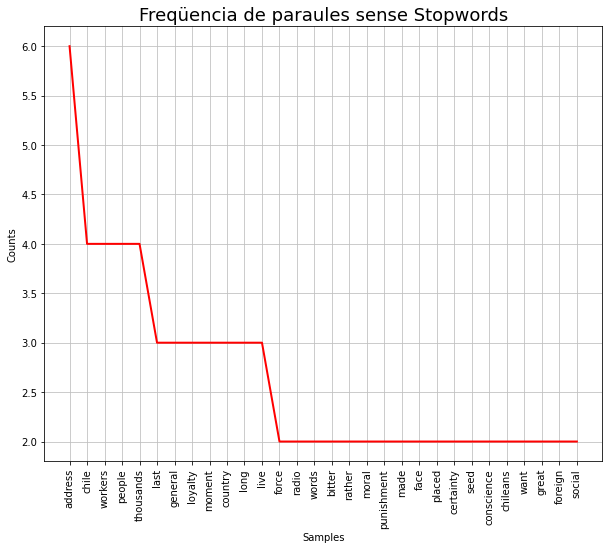

In [9]:
plt.figure(figsize=(10, 8))

plt.title('Freqüencia de paraules sense Stopwords', size=18)
freq_sense_stopw.plot(30, c='red')

plt.show()

Veiem com ha va canviant el to de l'anàlisi del discurs sense les Stopwords. Ara veiem com paraules com "address", "chile", "workers" i "people" agafan més importància i marquen aquest to d'un discurs fet per a la gent en un moment crític a la història de Xile.

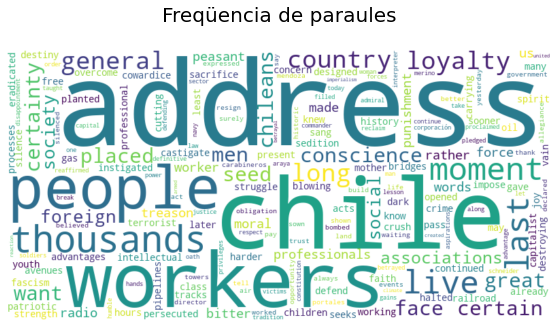

In [10]:
from wordcloud import WordCloud

word_freq_sense_sw = dict(zip(freq_sense_stopw_df['Paraula'], freq_sense_stopw_df['Frequencia']))
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq_sense_sw)

plt.figure(figsize=(10, 5))
plt.title('Freqüencia de paraules\n', size=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Stemming

Primer de tot, declarem el model i desprès fem el bucle pel discurss sense stopwords.

In [20]:
pstemmer = PorterStemmer()
speech_sense_stopw_stem = [pstemmer.stem(token) for token in speech_sense_stopw]


Ara calculem la freqüència de les paraules del discurs després del stemming.

In [23]:
freq_stemming = FreqDist(speech_sense_stopw_stem)

freq_stem_df = pd.DataFrame(FreqDist(speech_sense_stopw_stem).items(), columns=["Paraula", "Frequencia"]).sort_values(by="Frequencia", ascending=False)
freq_stem_df.head(20)

,Paraula,Frequencia
3,address,6
42,worker,6
55,thousand,4
23,chile,4
49,peopl,4
181,live,3
1,last,3
46,moment,3
180,long,3
30,gener,3


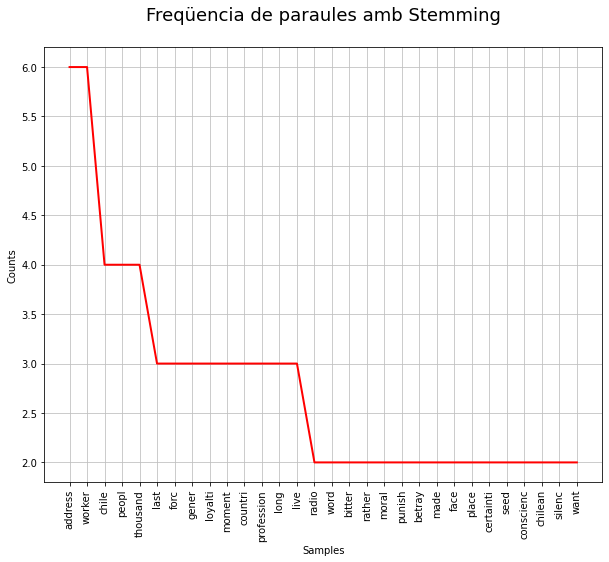

In [25]:
plt.figure(figsize=(10, 8))

plt.title('Freqüencia de paraules amb Stemming\n', size=18)
freq_stemming.plot(30, c='red')

plt.show()

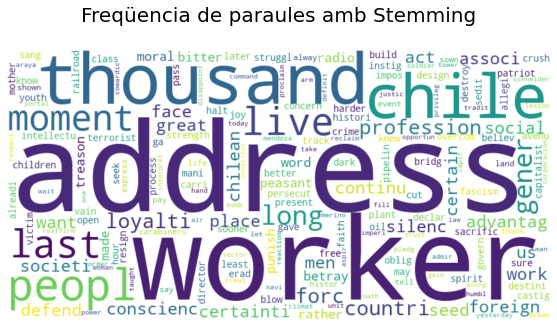

In [26]:
from wordcloud import WordCloud

word_freq_stem = dict(zip(freq_stem_df['Paraula'], freq_stem_df['Frequencia']))
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq_stem)

plt.figure(figsize=(10, 5))
plt.title('Freqüencia de paraules amb Stemming\n', size=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Després de fer el stemming veiem petits canvis si ho comparem amb el conjunt de dades només sense stopwords. La paraula "chile" passa el quart lloc de la llista mentre que l'arrel de "workers" ("worker") puja el segon lloc. En general totes les paraules del últim preporcessat mantenen el seu ordre.

### Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

In [22]:
sent_analy = SentimentIntensityAnalyzer()
sentiments = sent_analy.polarity_scores(speech)

print(sentiments)

{'neg': 0.097, 'neu': 0.732, 'pos': 0.171, 'compound': 0.9938}


Els números de l'anàlisi de sentiments ens parlen de manera general a través del "compound" d'una tendència positiva (perquè és molt aprop a 1). Com dèiem a l'inici de l'anàlisi, no teníem clar el to general del discurs però si sabíem que de manera general l'Allende parlava d'una manera esperançadora encara que sabia què li venia. Doncs, amb aquest anàlisi podem veure que ha predominant el sentiment esperançador positiu de manera important per sobre el negatiu que li despertaven els seus adversaris.